<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  624 non-null    object 
 1   Pos     624 non-null    object 
 2   Age     624 non-null    float64
 3   Tm      624 non-null    object 
 4   G       624 non-null    float64
 5   GS      624 non-null    float64
 6   MP      624 non-null    float64
 7   FG      624 non-null    float64
 8   FGA     624 non-null    float64
 9   FG%     620 non-null    float64
 10  3P      624 non-null    float64
 11  3PA     624 non-null    float64
 12  3P%     594 non-null    float64
 13  2P      624 non-null    float64
 14  2PA     624 non-null    float64
 15  2P%     615 non-null    float64
 16  eFG%    620 non-null    float64
 17  FT      624 non-null    float64
 18  FTA     624 non-null    float64
 19  FT%     572 non-null    float64
 20  ORB     624 non-null    float64
 21  DRB     624 non-null    float64
 22  TR

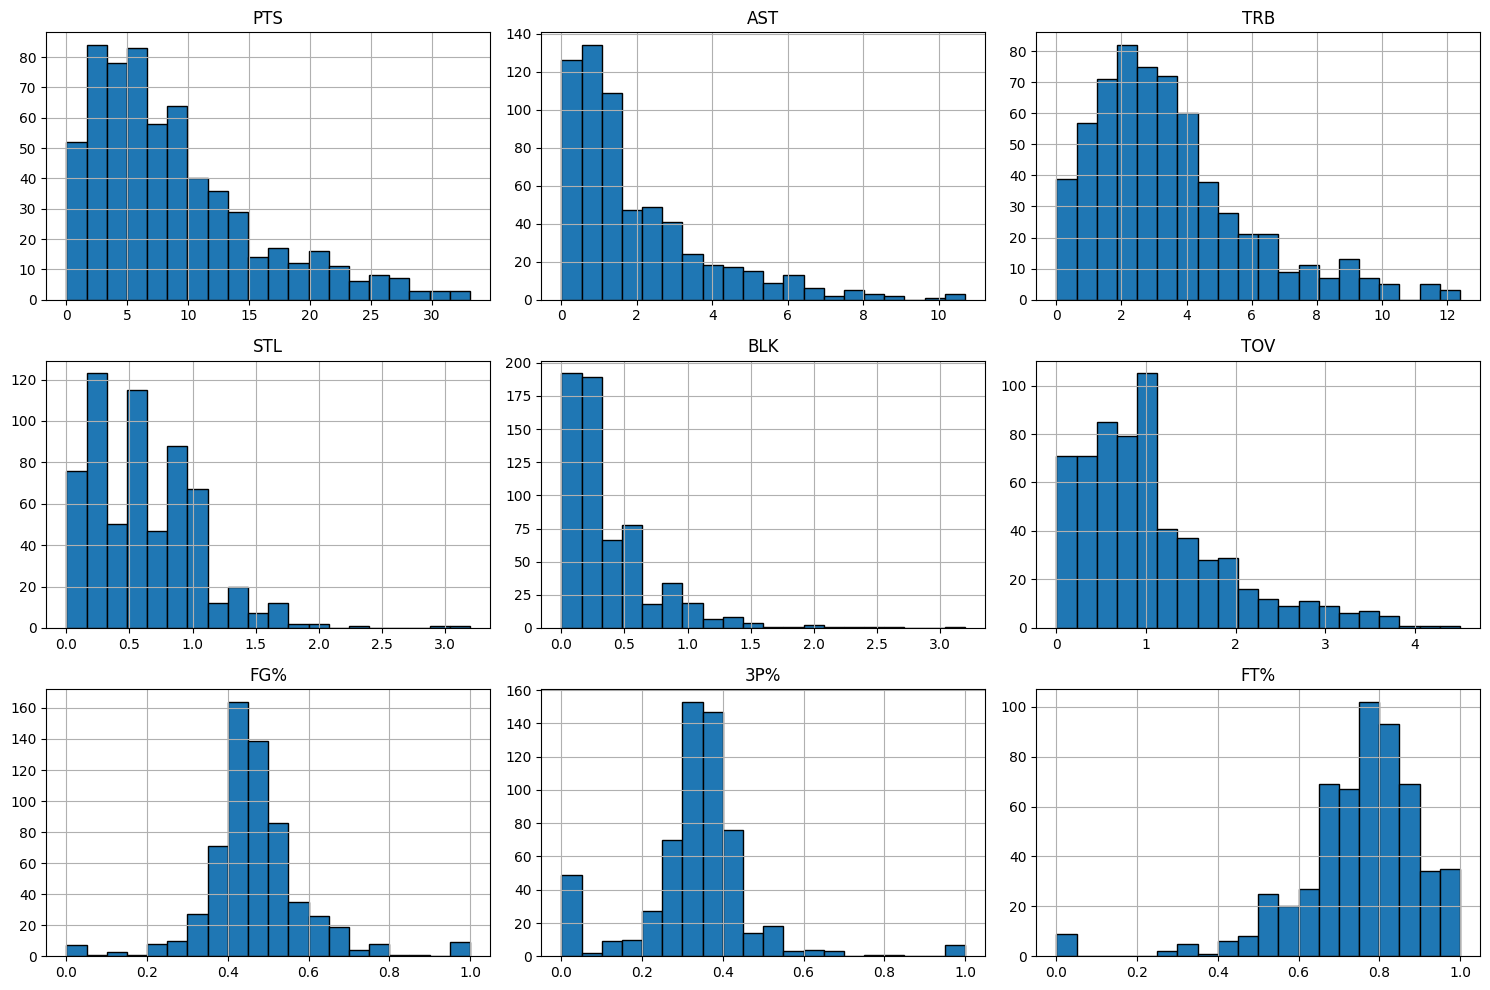

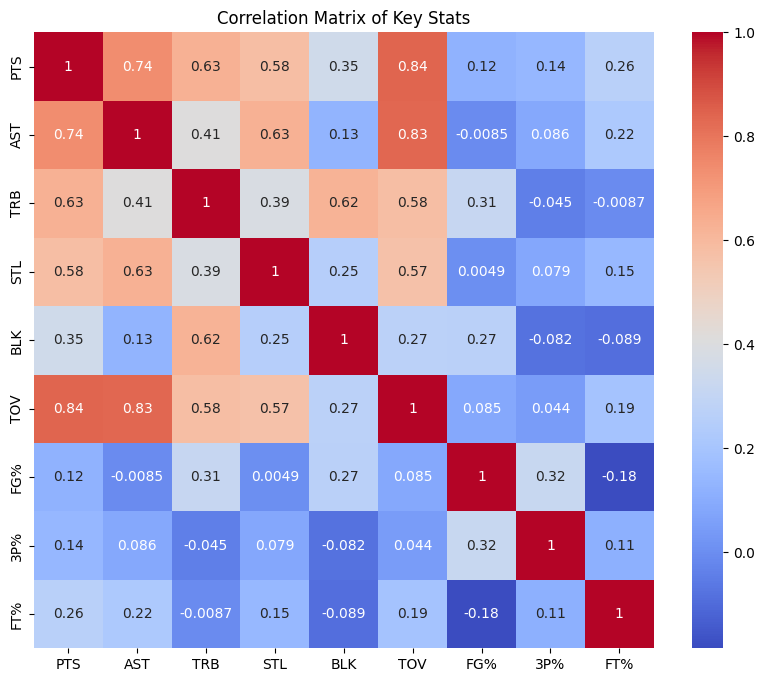

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('nba_data_processed.csv')  # Adjust path if needed

# Step 1: Basic info
print(df.info())
print(df.describe())

# Step 2: Plot distribution of key stats
key_stats = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'FG%', '3P%', 'FT%']
df[key_stats].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

# Step 3: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[key_stats].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Stats')
plt.show()

In [2]:
from sklearn.preprocessing import StandardScaler

# Step 1: Create new feature: Efficiency
df['Efficiency'] = df['PTS'] + df['TRB'] + df['AST'] + df['STL'] + df['BLK'] - df['TOV']

# Step 2: Select numerical columns for scaling
features_to_scale = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'FG%', '3P%', 'FT%', 'Efficiency']

# Step 3: Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features_to_scale])

# Step 4: Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=features_to_scale)
df_scaled.head()

,PTS,AST,TRB,STL,BLK,TOV,FG%,3P%,FT%,Efficiency
0,0.204918,-0.515224,1.301153,-0.027971,0.853146,0.161183,0.116726,-0.477535,-0.346702,0.387610
1,-0.031684,0.171177,3.332611,0.670181,1.886861,1.002339,1.011623,-2.246046,-2.321272,0.865323
2,1.831562,0.646378,2.627819,1.368333,1.111575,1.723330,0.536938,-1.681483,0.327689,2.028452
3,-0.564041,-0.726424,-0.688846,-0.958840,-0.697426,-0.920303,0.124507,0.447533,-0.389231,-0.702823
4,0.086617,-0.409624,0.471987,0.204746,0.853146,-0.439643,0.054472,0.229870,-0.103678,0.179908


In [3]:
# Correlation with the target variable PTS
correlations = df[[
    'AST', 'TRB', 'STL', 'BLK', 'TOV', 'FG%', '3P%', 'FT%', 'Efficiency'
]].corrwith(df['PTS'])

print("Correlation with PTS:")
print(correlations.sort_values(ascending=False))

Correlation with PTS:
Efficiency    0.971752
TOV           0.842088
AST           0.737982
TRB           0.626994
STL           0.581876
BLK           0.350204
FT%           0.260330
3P%           0.141725
FG%           0.122430
dtype: float64


In [5]:
# Fill missing values with column means
df_scaled_filled = df_scaled.fillna(df_scaled.mean())

# Redefine X and y
X = df_scaled_filled.drop('PTS', axis=1)
y = df_scaled_filled['PTS']

# Train model again
lr = LinearRegression()
lr.fit(X, y)

# Feature importance
feature_importance = pd.Series(lr.coef_, index=X.columns)
print("Linear Regression Coefficients:")
print(feature_importance.sort_values(ascending=False))

Linear Regression Coefficients:
Efficiency    1.423935e+00
TOV           1.230612e-01
FG%           3.122502e-16
FT%          -1.040834e-16
3P%          -1.700029e-16
BLK          -5.722148e-02
STL          -6.354351e-02
AST          -2.800691e-01
TRB          -3.566877e-01
dtype: float64


In [6]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Step 3: Train Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)

# Step 4: Evaluation
print("Linear Regression")
print("R² Score:", r2_score(y_test, lr_preds))
print("MAE:", mean_absolute_error(y_test, lr_preds))

print("\nRidge Regression")
print("R² Score:", r2_score(y_test, ridge_preds))
print("MAE:", mean_absolute_error(y_test, ridge_preds))


Linear Regression
R² Score: 1.0
MAE: 9.101441670243193e-16

Ridge Regression
R² Score: 0.9998719122871
MAE: 0.007809417452143286


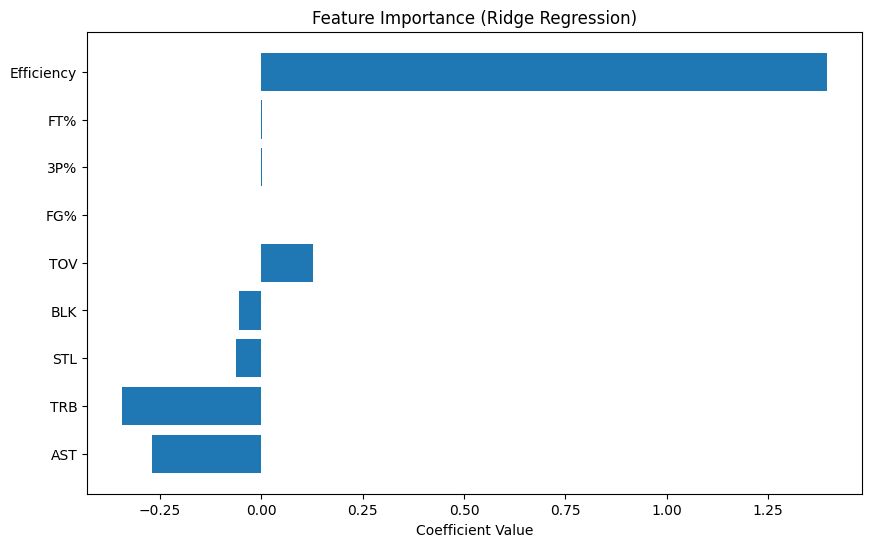

Most Important Features in Ridge Regression:
Efficiency
TRB
AST
TOV
STL
BLK
FT%
3P%
FG%


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Step 5: Feature Analysis

# Get coefficients from Ridge model (Ridge has coefficients)
ridge_coefficients = ridge.coef_

# Visualize the coefficients
plt.figure(figsize=(10, 6))
plt.barh(range(len(ridge_coefficients)), ridge_coefficients, align='center')
plt.yticks(range(len(ridge_coefficients)), X.columns)  # Assuming X has column names
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Ridge Regression)')
plt.show()

# If you want to sort and see the most important features
sorted_idx = np.argsort(np.abs(ridge_coefficients))[::-1]  # Sort by absolute value of coefficients
sorted_features = X.columns[sorted_idx]

print("Most Important Features in Ridge Regression:")
for feature in sorted_features[:10]:  # Display top 10 features
    print(feature)